# Στοχαστικές Ανελίξεις : 4η Εργαστηριακή Άσκηση

Όνομα: Μάριος Παπαχρήστου

ΑΜ: 03115101 (ΣΗΜΜΥ ΕΜΠ)

email: papachristoumarios@gmail.com

## Άσκηση 1η

In [2]:
import numpy as np
from numpy.random import choice

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)  # default figure size

In [3]:
np.random.seed(2017) 
def rand_walk_Z(start = 0, probs = (0.5, 0.5)):
    x = start
    steps = [-1, 1]  
    while True:  
        x += choice(steps, p=probs)
        yield x  


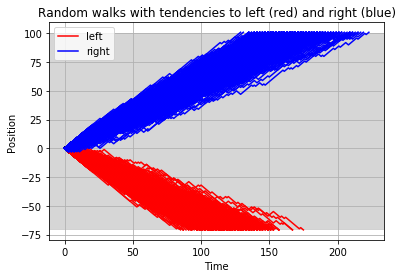

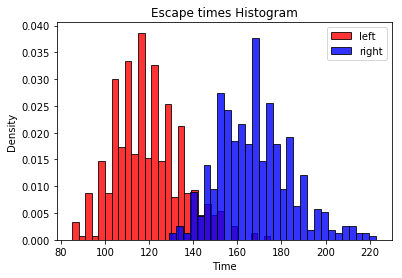

In [14]:
fig, ax = plt.subplots()  

a, b = -70, 100
N = 500
escape_times = {'left' : np.zeros(N, dtype=int), 'right' : np.zeros(N, dtype=int) }


for col in ['red', 'blue']:
    for j in range(N):
        x = 0 
        if col == 'red': walker = rand_walk_Z(start=x, probs=(4 / 5, 1 / 5))  
        else: walker = rand_walk_Z(start = x, probs = (1 / 5, 4 / 5))

        chain = [x]
        t = 0 #escape time counter
        while a <= x <= b:
            x = next(walker)
            chain.append(x)
            t += 1
        if col == 'red' : escape_times['left'][j] = t
        else : escape_times['right'][j] = t    
            
        ax.plot(chain, color=col, label='left' if col == 'red' else 'right')

# To look nicer
plt.axhspan(a, b, color = '#cccccc', alpha = 0.8)  # box between a & b
ax.grid()  # adds grid lines
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Random walks with tendencies to left (red) and right (blue)')
plt.legend()
# Show image!
plt.show()

plt.figure();
plt.hist(escape_times['left'], color='red', alpha = 0.8, bins=30, edgecolor='black', label='left', normed=True)
plt.hist(escape_times['right'], color='blue', alpha = 0.8, bins=30, edgecolor='black', label='right', normed=True)
plt.title('Escape times Histogram')
plt.xlabel('Time')
plt.legend()
plt.ylabel('Density')
plt.show()


## Σχολιασμός

Έστω $A = \{ X_n (\omega) \not \in [-70, 100] \mid n \in \mathbb N \}$ και $B = \emptyset$. Θέλουμε να εκτιμήσουμε την πιθανότητα $$\mathbb P_z [T_A < \infty]  = \Phi_A (z)$$ για κάποιο $z \in [-70, 100]$. 

Όπως γνωρίζουμε από τη θεωρία δυναμικού η συνάρτηση δυναμικού επιλύει το ΠΣΤ 
$$h(x) = p h(x+1) + (1-p)h(x-1), \qquad x \neq -71, 101$$
με συνοριακή συνθήκη
$$h(-71) = h (101) = 1$$

Γνωρίζουμε τη λύση της αναδρομής η οποία είναι η $h(x) = A + B [(1-p)/p]^x$ οπότε με χρήση ΣΣ μπορούμε να εξάγουμε τα δυναμικά. Είναι προφανές από τη λύση του συστήματος ότι για $p \neq 1/ 2$ είναι $B = 0, A = 1$. Επομένως h(x) = 1 και είμαστε έτσι βέβαιοι ότι ο ΤΠ θα εγκαταλείψει το $[-70, 100]$


## Άσκηση 2η

Προσομοιώνουμε με ένα generator μια αλυσίδα στο $\mathbb Z^+$

In [15]:
def rand_walk_Z_pos(start = 0, probs = (0.5, 0.5)):
    assert (start >= 0) #make sure we are in positive
    x = start
    steps = [-1, 1]  
    while True:  
        if x > 0: x += choice(steps, p=probs)
        else: x += choice([0, 1], p = probs) # handle 0
        yield x  

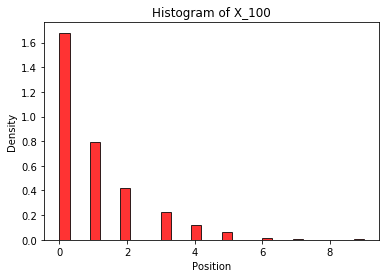

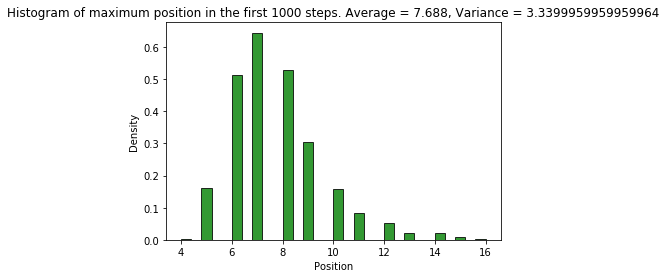

In [25]:
idx = 100
N = 1000
M = 1000
last_pos = np.zeros(N, dtype=int);
max_pos = -1 * np.ones(N, dtype=int);
assert (M >= idx)

for n in range(N):
    x = 0
    walker = rand_walk_Z_pos(start=x, probs = (2/3, 1/3))
    
    for t in range(M):
        x = next(walker)
        max_pos[n] = max(max_pos[n], x)
        if t == idx + 1 : last_pos[n] = x    

    
plt.figure();
plt.hist(last_pos, color='red', alpha = 0.8, bins=30, edgecolor='black', label='left', normed=True);
plt.xlabel('Position');
plt.ylabel('Density');
plt.title('Histogram of X_{}'.format(idx));
    
plt.figure();
plt.hist(max_pos, color='green', alpha = 0.8, bins=30, edgecolor='black', label='left', normed=True);
plt.xlabel('Position');
plt.ylabel('Density');
plt.title('Histogram of maximum position in the first {} steps. Average = {}, Variance = {}'.format(M, np.mean(max_pos), np.var(max_pos, ddof=1)));

Ο μέσος όρος της μέγιστης θέσης είναι 7.68 και η διασπορά 3.33 όπως φαίνεται στο διάγραμμα

## Άσκηση 3η

Κατασκευάζουμε για τις δοσμένες τιμές της ακτίνας το λογαριθμικό διάγραμμα μέσου χρόνου εξόδου, ακτίνας. 

Polyfit yielded: p = 1.988060580804461, q = 0.029942313042004277


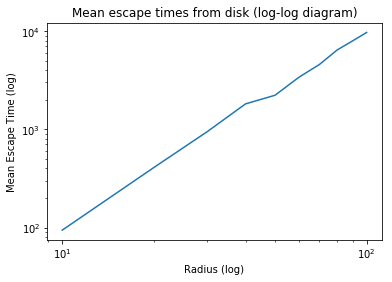

In [4]:
# random walk in Z^2 generator:
def rand_walk_Z2(start=(0, 0), probs=(0.25, 0.25, 0.25, 0.25)):
    # probs order (left, right, bottom, up)
    x, y = start
    steps = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    while True:
        dx, dy = steps[choice(4, p=probs)]  # choice(4) = choose a number in [0,3]
        x, y = x + dx, y + dy
        yield x, y
        
R = np.arange(10, 110, 10)
mean_escape_times = np.zeros(len(R))

N = 500


for i, r in enumerate(R):
    r2 = r**2 

    escape_time = np.zeros(N, dtype=int) 
    for n in range(N):
        walker = rand_walk_Z2()
        x, y = (0, 0)
        t = 0
        while x**2 + y**2 < r2:
            x, y = next(walker)
            t += 1
        escape_time[n] = t
    mean_escape_times[i] = np.mean(escape_time)

plt.figure();
plt.loglog(R, mean_escape_times);
plt.xlabel('Radius (log)');
plt.ylabel('Mean Escape Time (log)');
plt.title('Mean escape times from disk (log-log diagram)');

# polyfit
p, q = np.polyfit(np.log (R) , np.log(mean_escape_times), 1)  
print('Polyfit yielded: p = {}, q = {}'.format(p,q))


### Σχολιασμός 

Παρατηρούμε ότι έχουμε τετραγωνική εξάρτηση από το $r$ το οποίο είναι αναμενόμενο. Στρέφοντας 45 μοίρες το grid και θέτοντας $U_n = X_n^2 + Y_n^2$. Η $U_n$ παίρνει τιμές από τον χώρο $\mathbb X_U (r) = \{ 0, 1, \dots, r^2 \}$. Έχουμε ότι η $U_n$ αυξάνεται κατά 1 με πιθανότητα 1/4, μειώνεται κατά 1 με πιθανότητα 1/4 και παραμένει ίδια με πιθανοτητα 1/2 για τιμές της $U_n \in \mathbb X_U (r) - \{0, r^2 \}$.  Έστω επίσης το ενδεχόμενο $A(r)  = \{  U_n = r^2 \} $ Αυτό μας οδηγεί στο ΠΣΤ για την αναμενόμενη τιμή $g(u; r) = \mathbb E_u [T_{A(r)}] $: 

$$L g(u) = -1 \iff 1/4 g(u-1) + 1/4 g(u+1) - 1/2 g(u) + 1 = 0, \qquad u = 1, \dots, r^2 - 1$$
$$1/2g(1) - 1/2 g(0) + 1 = 0 $$
$$g(r^2) = 0$$

Η αρχική αναδρομική εύκολα αποδεικνύεται ότι έχει λύση $g(u) = u (c_2 - 2u + 2) + c_1$. Με εφαρμογή της συνοριακής συνθήκης στο $u = r^2$ έχουμε ότι

$$g(u; r) = \frac {-1} {r^2} (u - r^2) (c + 2r^2 u), \qquad u = 1, 2, \dots r^2$$

Για $u = 0$ η αναδρομική σχέση θα μας δώσει $g(0) =  \Theta ( r^2 )$ όπως φαίνεται παραπάνω.